# 1. Introducción del proyecto
---

En este estudio analizamos los datos históricos de ventas de videojuegos disponibles hasta diciembre de 2016, con el objetivo de identificar patrones que permitan predecir el éxito de nuevos lanzamientos.

Trabajamos para **Ice**, una tienda online que vende videojuegos en todo el mundo. Nuestra tarea es examinar cómo variables como la **plataforma**, el **género**, las **reseñas de usuarios y críticos**, y las **clasificaciones ESRB** se relacionan con el rendimiento comercial de los videojuegos.

Con base en este análisis, se busca determinar:
- Qué características están asociadas con mayores ventas.
- Qué plataformas o géneros son más rentables en distintas regiones.
- Cómo utilizar esta información para **planificar campañas publicitarias eficaces** para 2017.

El análisis se basa en un dataset que incluye títulos, plataformas, fechas de lanzamiento, ventas regionales y globales, puntuaciones de usuarios y críticos, y clasificaciones de contenido. A través de limpieza, exploración, visualización y análisis estadístico, construiremos un diagnóstico completo para respaldar decisiones estratégicas en marketing.


# 2. Preparación y limpieza de datos
---

Antes de realizar cualquier análisis significativo, es fundamental preparar adecuadamente los datos. Esta etapa garantiza que la información esté limpia, consistente y en un formato adecuado para ser analizado correctamente.

En esta sección se realizarán los siguientes pasos:

- Cargar el dataset y examinar su estructura general.
- Estandarizar los nombres de columnas a un formato uniforme (minúsculas).
- Convertir los tipos de datos a sus formatos correctos (por ejemplo, fechas y puntuaciones).
- Detectar y tratar valores ausentes, analizando su naturaleza y proponiendo soluciones justificadas.
- Tratar los valores no numéricos como `"TBD"` que impiden operaciones estadísticas.
- Crear una nueva columna llamada `total_sales`, que sume las ventas de todas las regiones para cada juego.

> La calidad del análisis depende directamente de la calidad de los datos. Por eso, esta fase no es un trámite técnico, sino un paso crítico de razonamiento analítico.


## 2.1. Carga de datos y revisión general

El primer paso en todo análisis es cargar el conjunto de datos y realizar una inspección exploratoria inicial. Esto nos permitirá entender la estructura, el tamaño del dataset, los tipos de datos presentes, y posibles irregularidades como valores nulos o atípicos.

En esta etapa utilizamos métodos como:
- `head()`: para ver las primeras filas del dataset.
- `info()`: para revisar los tipos de datos y valores nulos.
- `describe()`: para explorar estadísticas descriptivas básicas.

Esto nos da una primera aproximación a la calidad de los datos y nos orienta sobre qué transformaciones serán necesarias en los siguientes pasos.


In [1]:
# Importamos las bibliotecas necesarias para análisis y manipulación
import pandas as pd
import numpy as np

In [2]:
# Cargamos el archivo CSV con los datos de videojuegos
df = pd.read_csv('../data/games.csv')

# Mostramos las primeras 10 filas del dataset para observar la estructura general
print("Primeras filas del dataset:")
display(df.head())

# Información general del dataset: número de filas, columnas, tipos de datos, valores nulos
print("\nInformación del dataset:")
df.info()

# Estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas:")
display(df.describe())

Primeras filas del dataset:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Estadísticas descriptivas:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**TABLA `games`**

- `name` - *Nombre del videojuego registrado en el dataset.*
- `platform` - *Plataforma en la que fue lanzado el juego (por ejemplo: PS4, Xbox 360, PC, Wii, etc.).*
- `year_of_release` - *Año calendario en el que el juego fue lanzado al mercado.*
- `genre` - *Categoría o género principal del videojuego (ej. Acción, Deportes, Rol, Aventura, etc.).*
- `na_sales` - *Ventas del videojuego en Norteamérica, expresadas en millones de dólares estadounidenses.*
- `eu_sales` - *Ventas en Europa, también en millones de dólares.*
- `jp_sales` - *Ventas en Japón.*
- `other_sales` - *Ventas en otras regiones del mundo (fuera de NA, EU y JP).*
- `critic_score` - *Puntuación promedio otorgada por críticos especializados, en una escala de 0 a 100.*
- `user_score` - *Puntuación promedio otorgada por los usuarios, en una escala de 0 a 10. Algunos valores están marcados como `'tbd'` (to be determined), lo cual indica que no había suficientes valoraciones de usuarios al momento del registro y por tanto no se asignó una puntuación numérica.*
- `rating` - *Clasificación de contenido asignada por el sistema ESRB, que determina la edad mínima recomendada para el público objetivo del juego.*

***Nota:*** sobre la ESRB

> La **Entertainment Software Rating Board (ESRB)** es una organización que evalúa el contenido de los videojuegos y asigna una **clasificación por edad** para orientar a padres, tutores y consumidores. Las categorías más comunes son:
>
> - `E` — *Everyone* (Apto para todo público)  
> - `E10+` — *Everyone 10 and older* (Mayores de 10 años)  
> - `T` — *Teen* (Mayores de 13 años)  
> - `M` — *Mature* (Mayores de 17 años)  
> - `AO` — *Adults Only* (Solo adultos, mayores de 18 años)  
> - `RP` — *Rating Pending* (Clasificación pendiente al momento de publicación)

**CONCLUSIONES DE LA SECCIÓN 2.1**

Tras cargar el dataset `games.csv` y explorar su contenido inicial, se observaron los siguientes aspectos clave:

**Estructura y dimensión del dataset**
- El dataset contiene **16,715 registros** y **11 columnas**.
- Las columnas incluyen datos sobre:
  - Identidad del videojuego: `Name`, `Platform`, `Genre`, `Rating`
  - Año de lanzamiento: `Year_of_Release`
  - Ventas regionales: `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`
  - Opiniones de crítica y usuarios: `Critic_Score`, `User_Score`

**Valores ausentes**
- `name`: 2 valores nulos
- `Year_of_Release`: 269 valores nulos
- `genre`: 2 valores nulos
- `Critic_Score`: 8,578 valores nulos
- `User_Score`: 6,701 valores nulos
- `Rating`: 6,766 valores nulos

**Estadísticas descriptivas relevantes**
- Las ventas tienen una distribución **muy asimétrica**, con la mayoría de los valores cercanos a 0 y pocos valores extremadamente altos (outliers).
  - Por ejemplo, en `NA_sales`, la media es **0.26** pero el máximo es **41.36**.
- El año mínimo de lanzamiento registrado es **1980** y el máximo **2016**.
- Las puntuaciones de crítica (`Critic_Score`) oscilan entre **13 y 98**, con una media de **68.97**.

**Recomendaciones para el preprocesamiento**
- Convertir `Year_of_Release` a entero si es posible.
- Analizar y transformar `User_Score` para tratar los valores `"tbd"`.
- Evaluar cómo manejar los valores faltantes en `Critic_Score` y `Rating`.
- Crear una nueva columna `total_sales` que sume todas las ventas regionales.

Estas observaciones iniciales sientan las bases para una limpieza y transformación adecuadas en los siguientes pasos.


## 2.2. Estandarización de nombres de columnas

Para asegurar consistencia en el análisis y evitar errores al referirnos a las columnas del dataset, es una buena práctica estandarizar todos los nombres de columnas. En esta etapa convertiremos todos los nombres a minúsculas, lo que también facilitará el uso de funciones automatizadas y reduce ambigüedades tipográficas.

Este paso no altera el contenido de los datos, pero mejora la legibilidad, portabilidad y mantenimiento del código.


In [3]:
# Mostramos los nombres de columnas antes de estandarizarlos
print("Columnas originales:")
print(df.columns)

# Convertimos todos los nombres de columna a minúsculas
df.columns = df.columns.str.lower()

# Mostramos los nombres de columnas después del cambio
print("\nColumnas estandarizadas:")
print(df.columns)


Columnas originales:
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Columnas estandarizadas:
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


**CONCLUSIONES DE LA SECCIÓN 2.2**

Los nombres de las columnas del dataset han sido estandarizados correctamente a minúsculas utilizando el método `str.lower()`. Esto asegura mayor consistencia a lo largo del proyecto, evita errores tipográficos al acceder a columnas y mejora la legibilidad del código.

Este paso, aunque sencillo, es una práctica profesional recomendada para cualquier proceso de análisis de datos, especialmente en proyectos colaborativos o de larga duración.


## 2.3. Conversión de tipos de datos y justificación

Muchos análisis estadísticos requieren que los datos estén en el tipo adecuado. En esta sección corregiremos el tipo de dato de ciertas columnas para asegurar que puedan utilizarse correctamente en cálculos, agrupaciones y visualizaciones.

Nos enfocaremos en:

- Convertir `year_of_release` de `float64` a entero, utilizando un tipo que permita valores nulos (`Int64` de pandas).
- Convertir `user_score` de `object` a `float`, luego de reemplazar los valores `"tbd"` que no representan una puntuación válida.
- Verificar y confirmar que las demás columnas numéricas (`sales`, `critic_score`) ya están en tipo numérico correcto (`float64`).

Este paso es fundamental para garantizar la integridad de los cálculos posteriores y prevenir errores silenciosos o excepciones durante el análisis.


In [4]:
# Revisión inicial de tipos de datos
print("Tipos de datos antes de la conversión:")
print(df.dtypes)

# --- Conversión de 'year_of_release' ---
# Convertimos de float64 a entero nullable (Int64 de pandas) para mantener posibles valores nulos
df['year_of_release'] = df['year_of_release'].astype('Int64')

# --- Conversión de 'user_score' ---
# Primero reemplazamos los valores 'tbd' por NaN para poder convertir la columna a float
df['user_score'] = df['user_score'].replace('tbd', np.nan)

# Convertimos la columna a tipo float
df['user_score'] = df['user_score'].astype('float')

# Verificación de los nuevos tipos de datos
print("\nTipos de datos después de la conversión:")
print(df.dtypes)


Tipos de datos antes de la conversión:
name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Tipos de datos después de la conversión:
name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


**CONCLUSIONES DE LA SECCIÓN 2.3**

En esta etapa se corrigieron los tipos de datos de columnas críticas para el análisis estadístico:

- La columna `year_of_release` fue convertida de `float64` a `Int64` (entero nullable), permitiendo así representar años como valores enteros sin perder los registros con datos faltantes (`NaN`).
- La columna `user_score` fue limpiada reemplazando los valores no numéricos `"tbd"` por `NaN`, y luego convertida de `object` a `float64`. Esto permite utilizarla en cálculos y correlaciones sin errores de tipo.

Estas transformaciones aseguran integridad tipológica en el dataset y preparan las variables para su uso en análisis estadísticos, pruebas de hipótesis y modelos exploratorios en etapas posteriores del proyecto.


## 2.4. Análisis y tratamiento de valores ausentes

Los valores ausentes (NaN) pueden aparecer por diversas razones: datos incompletos, errores de captura, información irrelevante para ciertos casos, o placeholders como `"tbd"`, que ya han sido reemplazados por `NaN`.

En esta sección:
- Cuantificaremos la cantidad y proporción de datos ausentes por columna.
- Propondremos estrategias específicas para tratarlos: eliminar, imputar o conservar según su naturaleza y relevancia analítica.
- Justificaremos cada decisión para asegurar un tratamiento riguroso y coherente con el tipo de dato y los objetivos del análisis.


In [5]:
# Calculamos el total de valores nulos por columna
missing_values = df.isna().sum()

# Calculamos el porcentaje de valores nulos respecto al total de filas
missing_percentage = (missing_values / len(df)) * 100

# Unimos ambas métricas en un solo DataFrame para análisis claro
missing_report = pd.DataFrame({
    'Valores nulos': missing_values,
    'Porcentaje (%)': missing_percentage
}).sort_values(by='Valores nulos', ascending=False)

# Mostramos el reporte de valores ausentes
print("Reporte de valores ausentes:")
display(missing_report)


Reporte de valores ausentes:


,Valores nulos,Porcentaje (%)
user_score,9125,54.591684
critic_score,8578,51.319174
rating,6766,40.478612
year_of_release,269,1.609333
name,2,0.011965
genre,2,0.011965
platform,0,0.000000
jp_sales,0,0.000000
eu_sales,0,0.000000
na_sales,0,0.000000


**CONCLUSIONES DE LA SECCIÓN 2.4**

El análisis de valores ausentes arrojó los siguientes resultados:

| Columna         | Valores nulos | % del total |
|-----------------|----------------|--------------|
| `user_score`    | 9,125          | 54.6%        |
| `critic_score`  | 8,578          | 51.3%        |
| `rating`        | 6,766          | 40.5%        |
| `year_of_release` | 269         | 1.6%         |
| `name`          | 2              | ~0.01%       |
| `genre`         | 2              | ~0.01%       |

---

**Decisiones sobre tratamiento de valores ausentes:**

- **`user_score`**  
  Los valores `"tbd"` (to be determined) ya fueron tratados y convertidos a `NaN`. Representan juegos que **no tenían valoraciones suficientes al momento del registro**.  
  - *Decisión:* **Mantener los `NaN`**. No se imputarán porque no hay base sólida para asignar una puntuación ficticia y su ausencia podría ser informativa (ej. juegos nuevos o poco populares).

- **`critic_score`**  
  Similar al caso anterior, la ausencia indica que **no hubo evaluaciones críticas disponibles** para esos juegos.  
  - *Decisión:* **Mantener los `NaN`**. Imputar este valor afectaría el análisis de correlación y regresión. Su ausencia puede ser una característica relevante en sí misma.

- **`rating`**  
  Esta columna refleja la clasificación ESRB, que **no está presente en todos los mercados o juegos**, especialmente en títulos de regiones como Japón, donde se usa otro sistema (CERO).  
  - *Decisión:* **Mantener los `NaN`**. Eliminarlos o imputarlos podría sesgar el análisis regional.

- **`year_of_release`**  
  Tiene un porcentaje bajo de ausencias (1.6%) y es **una variable crítica** para análisis temporal.  
  - *Decisión:* **Eliminar registros con `NaN`** en esta columna para evitar ambigüedad cronológica.

- **`name` y `genre`**  
  Ambos casos son anecdóticos (2 valores nulos) y son **variables clave** para análisis y agrupaciones.  
  - *Decisión:* **Eliminar registros incompletos** en estas columnas.

---

**Posibles razones de valores ausentes**

- En `user_score` y `critic_score`: falta de evaluaciones al momento del registro del juego.
- En `rating`: lanzamientos no comercializados en EE. UU., juegos indie, o títulos no evaluados oficialmente.
- En `year_of_release`, `name` y `genre`: errores de captura, registros mal cargados o incompletos.

---

Estas decisiones garantizan un tratamiento ético y técnicamente justificado de los valores ausentes, alineado con las mejores prácticas de análisis de datos.

Procedemos a eliminar los registros con valores nulos en las columnas `year_of_release`, `name` y `genre`.


In [6]:
# Eliminamos filas con NaN en columnas críticas
df = df.dropna(subset=['year_of_release', 'name', 'genre'])

print("Dataset después de eliminar valores nulos")
df.info()


Dataset después de eliminar valores nulos
<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


**Eliminación de registros con valores nulos en columnas críticas**

Se eliminaron los registros que contenían valores nulos en las columnas `year_of_release`, `name` y `genre`, debido a que:

- Son variables clave para el análisis temporal, de identificación y de categorización.
- La cantidad de valores ausentes era muy baja y no justificaba imputación.
- Su ausencia impedía una segmentación y análisis correctos por género o por año.

Tras esta operación, el dataset quedó con **16,444 registros válidos**, manteniendo una alta representatividad y coherencia estructural para los análisis posteriores.


## 2.5. Creación de la columna `total_sales`

El conjunto de datos proporciona las ventas regionales desglosadas por región: América del Norte (`na_sales`), Europa (`eu_sales`), Japón (`jp_sales`) y otras regiones (`other_sales`).

Para facilitar análisis agregados y comparaciones de rendimiento global, crearemos una nueva columna llamada `total_sales` que represente la suma de ventas en todas las regiones por juego.

Este indicador se utilizará más adelante para estudiar la distribución general de ventas, generar diagramas de caja por plataforma, y comparar géneros o regiones según su rentabilidad comercial.


In [7]:
# Creamos la nueva columna 'total_sales' sumando todas las regiones
df['total_sales'] = (
    df['na_sales'] +
    df['eu_sales'] +
    df['jp_sales'] +
    df['other_sales']
)

# Verificamos las primeras filas para comprobar la nueva columna
print("Primeras filas con 'total_sales':")
display(df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())


Primeras filas con 'total_sales':


,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


**CONCLUSIONES DE LA SECCIÓN 2.5**

Se ha creado exitosamente la columna `total_sales`, que representa la suma de las ventas globales por juego en millones de dólares, sumando las siguientes columnas:

- `na_sales` (Norteamérica)
- `eu_sales` (Europa)
- `jp_sales` (Japón)
- `other_sales` (otras regiones)

Este nuevo campo nos permitirá:

- Comparar el rendimiento global de los videojuegos.
- Analizar distribuciones de ventas por plataforma, género o año.
- Estimar tendencias generales y regionales con mayor precisión.

La verificación de las primeras filas demuestra que la suma fue correctamente calculada y que no hay problemas de valores ausentes o desalineación. Este indicador será esencial en las fases siguientes del análisis.


# 3. Análisis exploratorio de datos (EDA)
---

En esta sección realizaremos un análisis exploratorio profundo del dataset con el objetivo de descubrir patrones, comportamientos, relaciones y anomalías en los datos que puedan aportar información valiosa para la toma de decisiones estratégicas.

Este análisis nos permitirá:

- Evaluar la distribución temporal de los lanzamientos.
- Identificar las plataformas con mayor éxito comercial y su evolución.
- Determinar el periodo más relevante para modelar las ventas futuras.
- Analizar el impacto de las reseñas de usuarios y críticos sobre las ventas.
- Estudiar la rentabilidad de los distintos géneros.
- Evaluar la dispersión y los valores atípicos a través de diagramas de caja.

Durante esta etapa utilizaremos herramientas como agrupaciones (`groupby`), visualizaciones (`matplotlib`) y correlaciones estadísticas para entender cómo interactúan las variables clave del negocio. Cada hallazgo será interpretado críticamente para guiar la planificación de campañas de marketing enfocadas al año 2017.

> Esta sección es esencial para fundamentar cualquier inferencia posterior, ya que traduce los datos crudos en conocimiento accionable y respaldado por evidencia empírica.


## 3.1. Juegos lanzados por año

Antes de analizar ventas o tendencias por plataforma, es importante conocer cómo ha sido la distribución de lanzamientos de videojuegos a lo largo del tiempo. Esta exploración nos permitirá:

- Evaluar si hay una tendencia creciente o decreciente en la producción de juegos.
- Identificar años con baja densidad de datos, que podrían ser poco confiables.
- Determinar un rango de años recientes relevantes para analizar las tendencias del mercado actual.

Esto es especialmente importante para delimitar el periodo de datos que se utilizará como referencia para pronosticar campañas publicitarias en 2017.


In [8]:
#Importar librería de Matplotlib para visualización de datos
import matplotlib.pyplot as plt

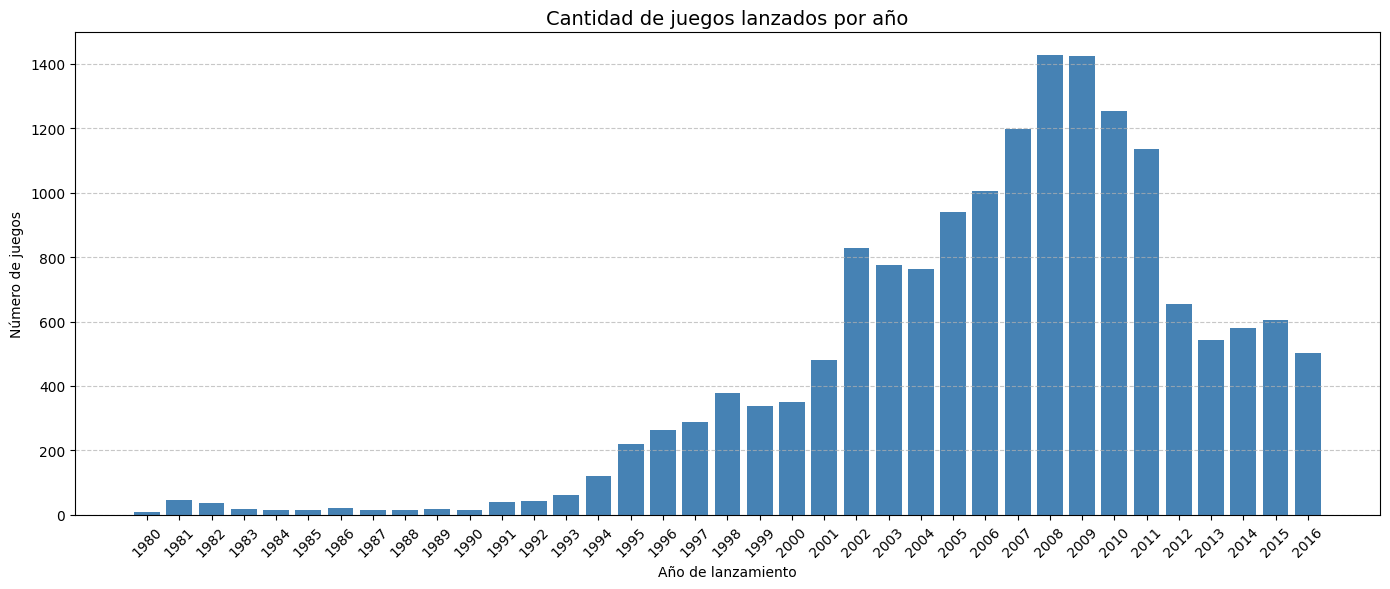

In [9]:
# Contamos los juegos por año y ordenamos por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Creamos el gráfico
plt.figure(figsize=(14, 6))
plt.bar(games_per_year.index, games_per_year.values, color='steelblue')

# Mostramos todas las marcas del eje X usando el índice como lista
plt.xticks(ticks=games_per_year.index, rotation=45)

# Títulos y etiquetas
plt.title('Cantidad de juegos lanzados por año', fontsize=14)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**CONCLUSIONES DE LA SECCIÓN 3.1**

El análisis de lanzamientos por año revela patrones importantes en la evolución histórica del mercado de videojuegos:

- Desde 1980 hasta mediados de los 90, el número de lanzamientos fue muy bajo, con escasa representatividad estadística.
- A partir de **1995**, se observa un crecimiento progresivo, y desde **2002**, el número de lanzamientos anuales supera los 500 juegos.
- El pico máximo se alcanza entre **2007 y 2009**, con más de **1,400 juegos lanzados por año**, lo que sugiere una saturación del mercado o una época de alta expansión.
- A partir de **2011**, la tendencia muestra una reducción sostenida, probablemente asociada a cambios en el modelo de distribución (paso a plataformas digitales), crisis económicas, o un cambio en la dinámica de publicación de títulos.
- El año **2016** muestra una caída notable, lo cual coincide con la advertencia del proyecto: *los datos para ese año pueden estar incompletos*.

**Implicación clave**: Para realizar análisis sólidos y representativos sobre tendencias actuales del mercado, será más confiable trabajar con datos a partir de **2002 o 2003 en adelante**, cuando el volumen de lanzamientos es estable y estadísticamente significativo.


## 3.2. Ventas por plataforma y análisis de evolución

En esta sección analizaremos cómo se distribuyen las ventas totales entre las diferentes plataformas, y cómo ha evolucionado su rendimiento comercial a lo largo del tiempo.

Los objetivos principales son:

- Identificar las plataformas con mayores ventas acumuladas.
- Visualizar cómo cambian las ventas por plataforma en distintos años.
- Detectar plataformas que estuvieron en auge pero ya no generan ventas.
- Entender cuánto tiempo tarda una plataforma en consolidarse o desaparecer.

Este análisis es clave para identificar qué plataformas son más rentables y qué tan rápido cambia el panorama del mercado.


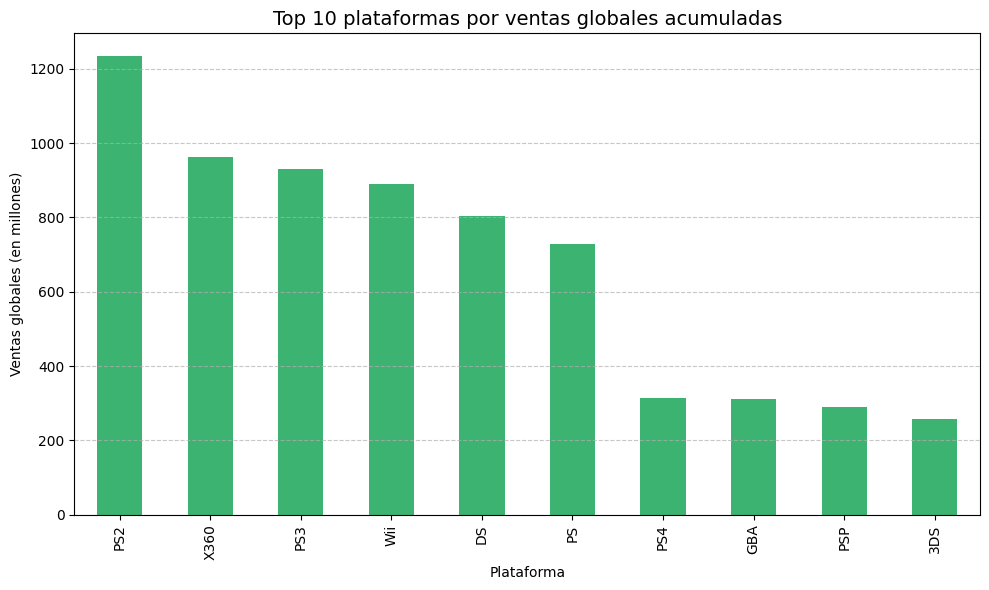

In [10]:
# Agrupamos por plataforma y sumamos las ventas totales
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seleccionamos las 10 plataformas con mayores ventas acumuladas
top_platforms = platform_sales.head(10)

# Creamos gráfico de barras
plt.figure(figsize=(10, 6))
top_platforms.plot(kind='bar', color='mediumseagreen')

# Títulos y etiquetas
plt.title('Top 10 plataformas por ventas globales acumuladas', fontsize=14)
plt.ylabel('Ventas globales (en millones)')
plt.xlabel('Plataforma')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**CONCLUSIONES DE LA SECCIÓN 3.2**

El análisis de las plataformas con mayores ventas globales acumuladas muestra una clara dominancia de las consolas de Sony y Microsoft:

- **PS2** lidera con más de **1,200 millones de unidades vendidas**, consolidándose como la plataforma más exitosa en términos comerciales.
- Le siguen **X360**, **PS3** y **Wii**, todas con ventas superiores a los **900 millones**, lo que refleja una generación con gran penetración de mercado y fuerte competencia.
- La **DS** y la **PS** (PlayStation original) también se posicionan como plataformas históricas de alto impacto.
- Entre las más recientes, **PS4** ya aparece dentro del top 10, lo que sugiere un crecimiento acelerado pese a tener menos años en el mercado en comparación con sus predecesoras.

**Observaciones importantes:**
- Las plataformas portátiles como **GBA**, **PSP** y **3DS** también lograron un volumen de ventas considerable, lo que indica un nicho sólido en el mercado portátil.
- La mayoría de las plataformas del top 10 corresponden a generaciones que estuvieron activas entre **2000 y 2015**, lo cual será importante al evaluar plataformas actuales versus aquellas en declive.

Este análisis sirve como base para observar en la siguiente sección cómo estas plataformas evolucionaron a lo largo del tiempo y cuáles son relevantes para la predicción del año 2017.


## 3.3. Selección del periodo relevante para el análisis

Antes de continuar con el análisis detallado por plataforma, es necesario acotar el rango temporal sobre el cual se evaluarán las ventas y tendencias.

Trabajar con todos los años disponibles desde 1980 puede introducir ruido, ya que:
- Las plataformas cambian con el tiempo.
- Los hábitos de consumo evolucionan.
- Muchas plataformas históricas ya no están activas.
- El volumen de datos en años tempranos es muy bajo y poco confiable.

El objetivo de esta sección es **definir un periodo de entrenamiento razonable**, que permita:
- Analizar plataformas que aún podrían tener impacto en 2017.
- Usar datos suficientemente recientes para inferir el comportamiento futuro del mercado.

Esta selección será la base para los análisis de plataformas activas, boxplots, impacto de reseñas y pruebas de hipótesis.


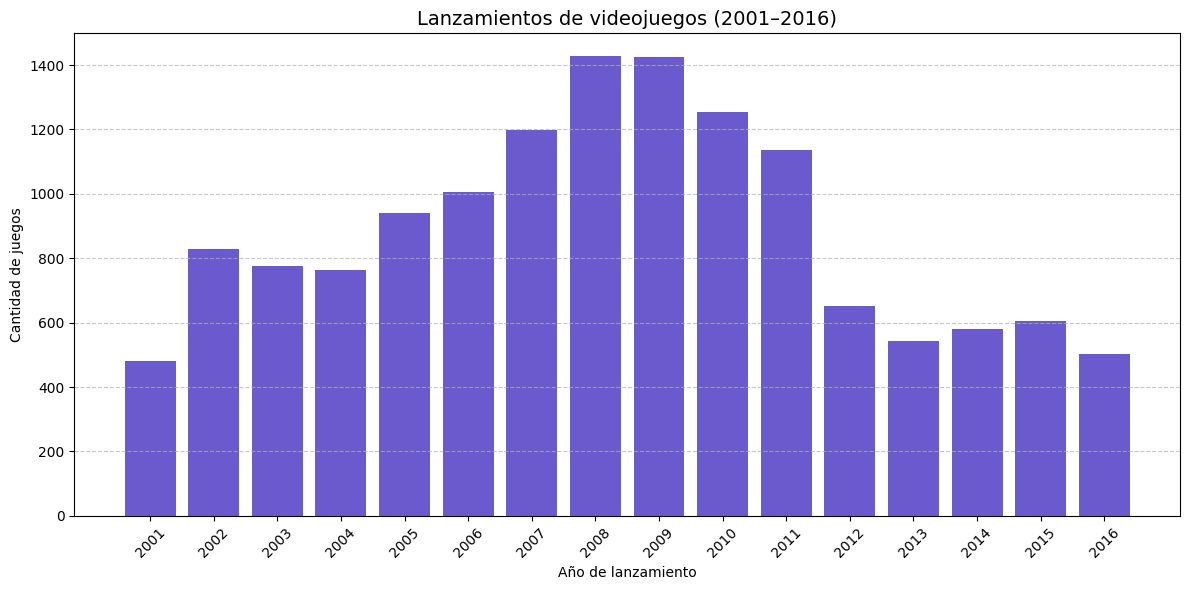

In [11]:
# Contamos lanzamientos por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Creamos gráfico focalizado en los últimos 15 años
recent_years = games_per_year[games_per_year.index >= 2001]

plt.figure(figsize=(12, 6))
plt.bar(recent_years.index, recent_years.values, color='slateblue')

plt.title('Lanzamientos de videojuegos (2001–2016)', fontsize=14)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(recent_years.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**CONCLUSIONES DE LA SECCIÓN 3.3**

El análisis de lanzamientos recientes (2001–2016) revela tres etapas claras:

1. **2001–2006:** Crecimiento progresivo del mercado, con una base sólida de lanzamientos anuales.
2. **2007–2011:** Auge absoluto del sector, con más de 1,200 juegos lanzados por año.
3. **2012–2016:** Disminución paulatina en el número de lanzamientos, posiblemente debido a la transición a plataformas digitales, consolidación de títulos AAA, o reestructuración de la industria.

**A partir de 2013**, el número de lanzamientos se estabiliza en torno a los 550–600 juegos por año, reflejando una nueva fase del mercado donde:

- Las plataformas vigentes aún están activas.
- La cantidad de datos es suficiente para análisis estadísticamente válidos.
- Los hábitos de consumo y criterios de desarrollo son más similares a los del año 2017.

**Decisión metodológica:**  
> Se trabajará con los datos desde el año **2013 en adelante** para el análisis exploratorio, comparaciones entre plataformas y evaluación de comportamiento regional. Este rango temporal será nuestra “ventana de entrenamiento” para construir recomendaciones de marketing orientadas al año 2017.


## 3.4. Plataformas líderes, en crecimiento y en declive

Tras haber delimitado el período de análisis (2013–2016), el siguiente paso es identificar qué plataformas:

- Se mantienen como líderes en ventas globales.
- Están ganando terreno de forma consistente.
- Han entrado en declive y podrían desaparecer pronto del mercado.

Este análisis es esencial para que el equipo de marketing de Ice sepa en qué plataformas **invertir recursos publicitarios** y cuáles **ya no representan un retorno significativo**.

Utilizaremos un gráfico de líneas para visualizar cómo evolucionan las ventas totales por año, separadas por plataforma, dentro del periodo reciente.


<Figure size 1400x600 with 0 Axes>

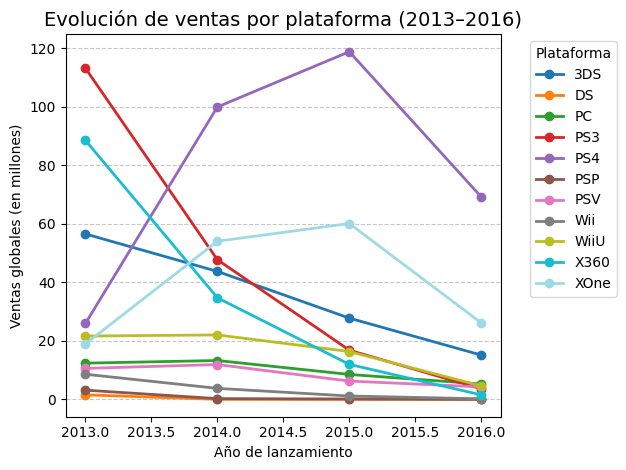

In [12]:
# Filtramos al período de entrenamiento
df_recent = df[df['year_of_release'] >= 2013]

# Agrupamos por año y plataforma, sumamos ventas
sales_by_platform_year = (
    df_recent.groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .unstack(fill_value=0)
)

# Graficamos con una paleta de colores bien diferenciada
plt.figure(figsize=(14, 6))
sales_by_platform_year.plot(
    kind='line',
    marker='o',
    colormap='tab20',
    linewidth=2
)

# Títulos y formato
plt.title('Evolución de ventas por plataforma (2013–2016)', fontsize=14)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**CONCLUSIONES DE LA SECCIÓN 3.4**

El análisis de ventas por plataforma entre 2013 y 2016 revela patrones claros de liderazgo, crecimiento y declive en el mercado de videojuegos:

**Plataformas líderes (en auge o estables)**
- **PS4** muestra un crecimiento sostenido desde 2013 y alcanza su punto más alto en 2015, manteniéndose como la plataforma más fuerte en 2016.
- **XOne** (Xbox One) también tiene una presencia importante, aunque con una curva ligeramente más moderada.

Estas plataformas representan el **núcleo del mercado actual** y deben ser el foco principal de las campañas para 2017.

---

**Plataformas en declive**
- **X360**, **PS3** y **Wii** muestran una caída progresiva y pronunciada en ventas, desapareciendo prácticamente en 2016.
- Estas plataformas han quedado obsoletas o han sido reemplazadas por sus sucesoras.

---

**Plataformas irrelevantes o desaparecidas**
- **PSP**, **DS**, **WiiU** y **PSV** tienen ventas mínimas y en descenso constante. Aunque algunas aún tienen lanzamientos, **su ciclo comercial ha terminado**.
- La **3DS** mantiene un volumen intermedio pero también muestra declive sostenido.

---

**Curiosidad: PC**
- La plataforma **PC** muestra un comportamiento estable, aunque con menor volumen relativo. Esto podría deberse a diferencias en los modelos de distribución o a la falta de registro completo en este dataset.

---

**Conclusión estratégica:**  
Para orientar la campaña de publicidad en 2017, se recomienda **centrar esfuerzos en PS4 y XOne**, las únicas plataformas con ventas relevantes y vigencia clara. Las demás plataformas han entrado en declive o han desaparecido del mercado, por lo que no representan oportunidades comerciales significativas.


## 3.5. Diagrama de caja de ventas globales por plataforma

En esta sección analizaremos la distribución de las ventas globales (`total_sales`) por plataforma activa entre 2013 y 2016 utilizando diagramas de caja (boxplots). Esta visualización permite:

- Comparar la mediana de ventas entre plataformas.
- Evaluar la dispersión de los datos.
- Identificar valores atípicos (outliers) que podrían influir desproporcionadamente en las estadísticas.
- Comprender la estabilidad o volatilidad comercial de cada consola.

Esta información será útil para valorar el **riesgo** asociado a cada plataforma desde una perspectiva comercial.


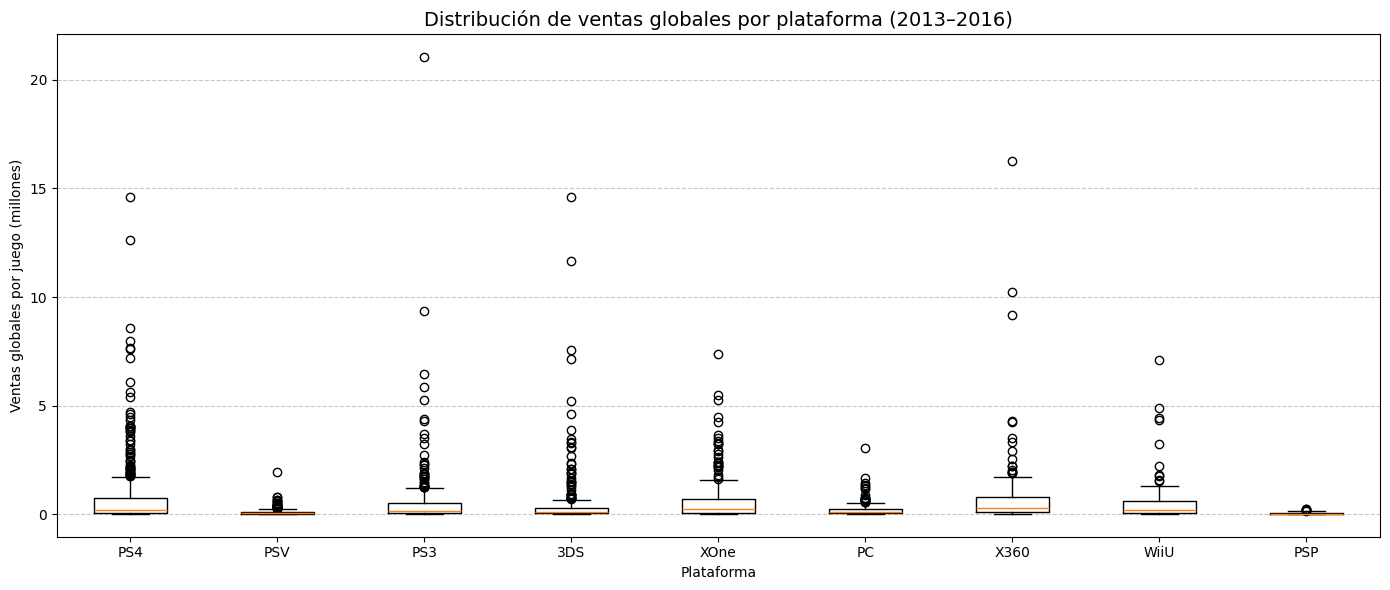

In [13]:
# Filtramos el dataset al periodo y plataformas activas
df_recent = df[df['year_of_release'] >= 2013]

# Seleccionamos plataformas con al menos 50 juegos para evitar sesgos extremos
platform_counts = df_recent['platform'].value_counts()
active_platforms = platform_counts[platform_counts >= 50].index

# Filtramos nuevamente el dataframe solo con esas plataformas activas
df_box = df_recent[df_recent['platform'].isin(active_platforms)]

# Preparamos los datos para el boxplot
data_to_plot = [df_box[df_box['platform'] == platform]['total_sales'] for platform in active_platforms]

# Creamos el diagrama de caja
plt.figure(figsize=(14, 6))
plt.boxplot(data_to_plot, tick_labels=active_platforms, showfliers=True)

# Títulos y formato
plt.title('Distribución de ventas globales por plataforma (2013–2016)', fontsize=14)
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales por juego (millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**CONCLUSIONES DE LA SECCIÓN 3.5**

El análisis de la distribución de ventas globales por plataforma entre 2013 y 2016 mediante un diagrama de caja revela los siguientes hallazgos:

**Mediana de ventas**
- **PS4**, **XOne** y **3DS** presentan una mediana de ventas más alta que el resto, lo que indica un rendimiento comercial más constante para la mayoría de sus títulos.
- Otras plataformas como **PSV**, **PSP**, **WiiU** y **PC** tienen medianas muy bajas, cercanas a cero, reflejando ventas modestas en la mayoría de sus juegos.

**Dispersión y presencia de outliers**
- Todas las plataformas tienen numerosos **outliers** (juegos con ventas excepcionalmente altas), lo cual es común en esta industria donde pocos títulos concentran la mayoría de los ingresos.
- **PS4** y **X360** exhiben los outliers más extremos, con juegos que superan los **20 millones de unidades vendidas**, lo que muestra su capacidad para producir "blockbusters".

**Consistencia vs. Riesgo**
- Plataformas como **PS4**, **XOne** y **3DS** muestran una **distribución más equilibrada**, lo cual sugiere menor riesgo para los lanzamientos promedio.
- Plataformas como **WiiU**, **PSV** y **PSP** tienen una base más estrecha y dispersión limitada, lo que sugiere que el potencial comercial es bajo incluso para títulos exitosos.

---

**Conclusión estratégica:**  
> Las plataformas **PS4**, **XOne** y en menor medida **3DS** representan **buenas oportunidades comerciales** tanto por su mediana de ventas como por su potencial de outliers. Las plataformas con mediana baja y poco rango deben considerarse con precaución en campañas publicitarias.


## 3.6. Impácto de las críticas de usuarios y expertos en las ventas

En esta sección analizaremos si existe correlación entre:

- Las puntuaciones otorgadas por críticos (`critic_score`).
- Las puntuaciones otorgadas por los usuarios (`user_score`).
- Y las ventas globales (`total_sales`).

El objetivo es determinar si una mejor calificación se traduce, en promedio, en un mayor éxito comercial.

Nos enfocaremos en una plataforma actual con alto volumen de datos —como **PS4**— para garantizar consistencia y representatividad en los resultados. Calcularemos el coeficiente de correlación y graficaremos la relación mediante  un diagrama de dispersión.


Correlación entre total_sales y critic_score (PS4): 0.406
Correlación entre total_sales y user_score (PS4): -0.034


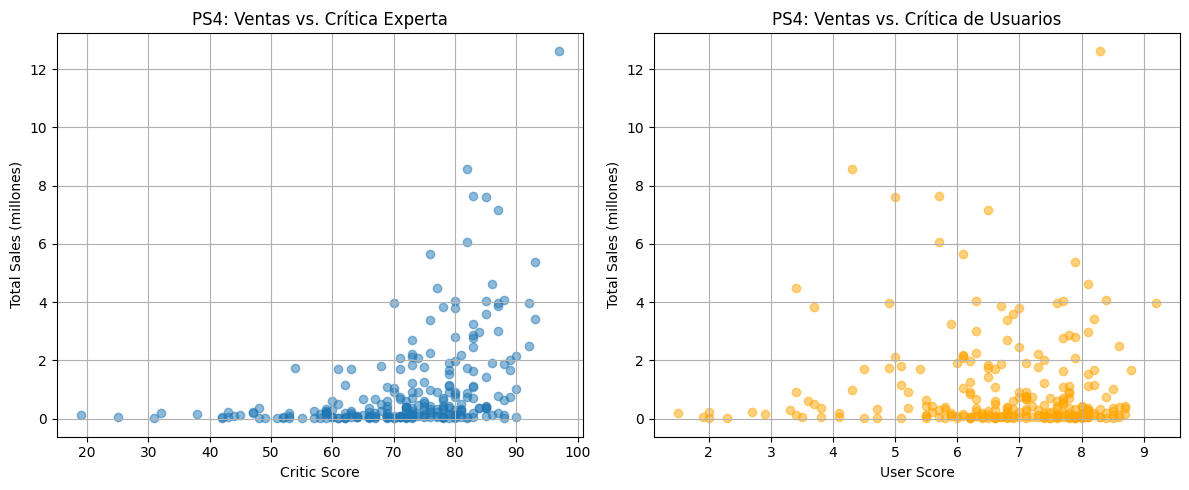

In [14]:
# Filtramos juegos de PS4
ps4_games = df[(df['platform'] == 'PS4') & (df['critic_score'].notna()) & (df['user_score'].notna())]

# --- Correlaciones ---
corr_critic = ps4_games['total_sales'].corr(ps4_games['critic_score'])
corr_user = ps4_games['total_sales'].corr(ps4_games['user_score'])

print(f"Correlación entre total_sales y critic_score (PS4): {corr_critic:.3f}")
print(f"Correlación entre total_sales y user_score (PS4): {corr_user:.3f}")

# --- Gráficos de dispersión ---

plt.figure(figsize=(12, 5))

# Critic Score vs Ventas
plt.subplot(1, 2, 1)
plt.scatter(ps4_games['critic_score'], ps4_games['total_sales'], alpha=0.5)
plt.title('PS4: Ventas vs. Crítica Experta')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millones)')
plt.grid(True)

# User Score vs Ventas
plt.subplot(1, 2, 2)
plt.scatter(ps4_games['user_score'], ps4_games['total_sales'], alpha=0.5, color='orange')
plt.title('PS4: Ventas vs. Crítica de Usuarios')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millones)')
plt.grid(True)

plt.tight_layout()
plt.show()


**CONCLUSIONES DE LA SECCIÓN 3.6**

El análisis sobre el impacto de las valoraciones en las ventas globales de videojuegos para la plataforma **PS4** revela lo siguiente:

**Correlación con `critic_score` (crítica profesional):**
- Coeficiente de correlación de **+0.406**
- Se trata de una correlación **positiva moderada**, lo cual sugiere que los juegos con mejores puntuaciones de la crítica **tienden a vender más**.
- Aunque no es una relación causal ni fuerte, sí indica que la crítica profesional puede influir en la decisión de compra, especialmente en el segmento de jugadores que consume medios especializados.

**Correlación con `user_score` (crítica de usuarios):**
- Coeficiente de correlación de **–0.034**
- Esta correlación es **prácticamente nula**, lo cual indica que la opinión promedio de los usuarios **no tiene relación directa con las ventas**.
- Esto podría deberse a que las compras suelen hacerse antes de las reseñas, o a que las campañas publicitarias, el prestigio de la franquicia o el hype tienen más peso que la valoración posterior del jugador.

---

**Gráficos de dispersión:**
- El gráfico `critic_score vs total_sales` muestra cierta tendencia ascendente, aunque con alta dispersión.
- En cambio, el gráfico `user_score vs total_sales` no muestra ninguna tendencia visible, y las ventas parecen distribuirse aleatoriamente.

---

**Conclusión estratégica:**  
> La crítica profesional tiene un efecto positivo (aunque moderado) sobre las ventas, mientras que las valoraciones de usuarios no parecen tener influencia estadísticamente significativa en el rendimiento comercial.


## 3.7. Comparación de ventas por género

En esta sección analizaremos cómo se distribuyen las ventas globales según el género de los videojuegos (`genre`). Nuestro objetivo es:

- Identificar los géneros más rentables en términos absolutos.
- Comparar la mediana de ventas por género, lo cual nos indica el rendimiento típico.
- Evaluar la dispersión y presencia de outliers que caracterizan a ciertos géneros.

Este análisis será crucial para entender qué tipo de juegos son comercialmente más atractivos, más allá de plataformas específicas.


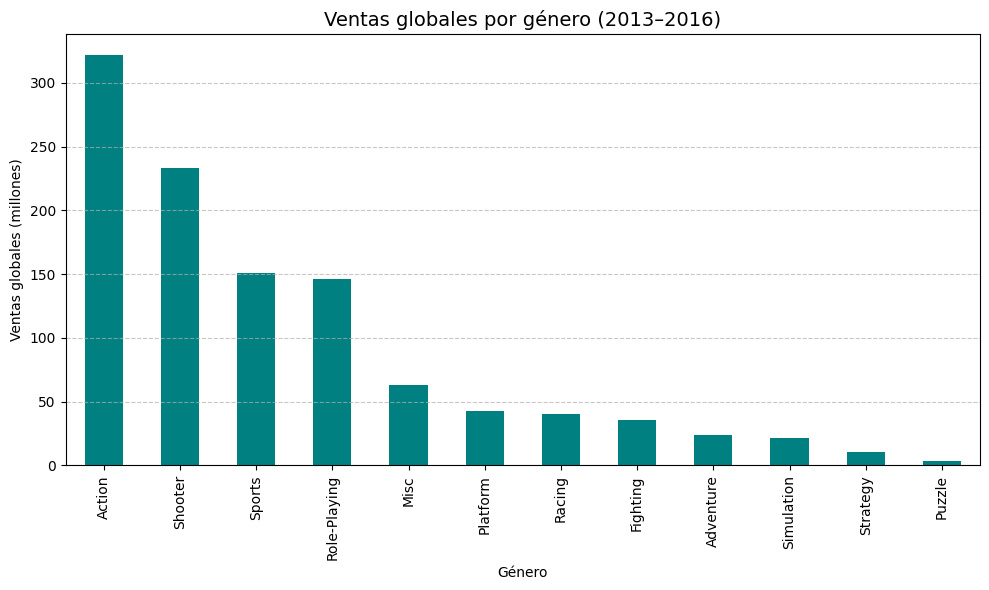

In [15]:
# Filtramos al período reciente
df_recent = df[df['year_of_release'] >= 2013]

# Agrupamos por género y sumamos las ventas totales
genre_sales_total = df_recent.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Gráfico de barras: ventas totales por género

plt.figure(figsize=(10, 6))
genre_sales_total.plot(kind='bar', color='teal')

plt.title('Ventas globales por género (2013–2016)', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\cjhir\AppData\Local\Temp\ipykernel_19936\19694850.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_genre, labels=genres, showfliers=True)


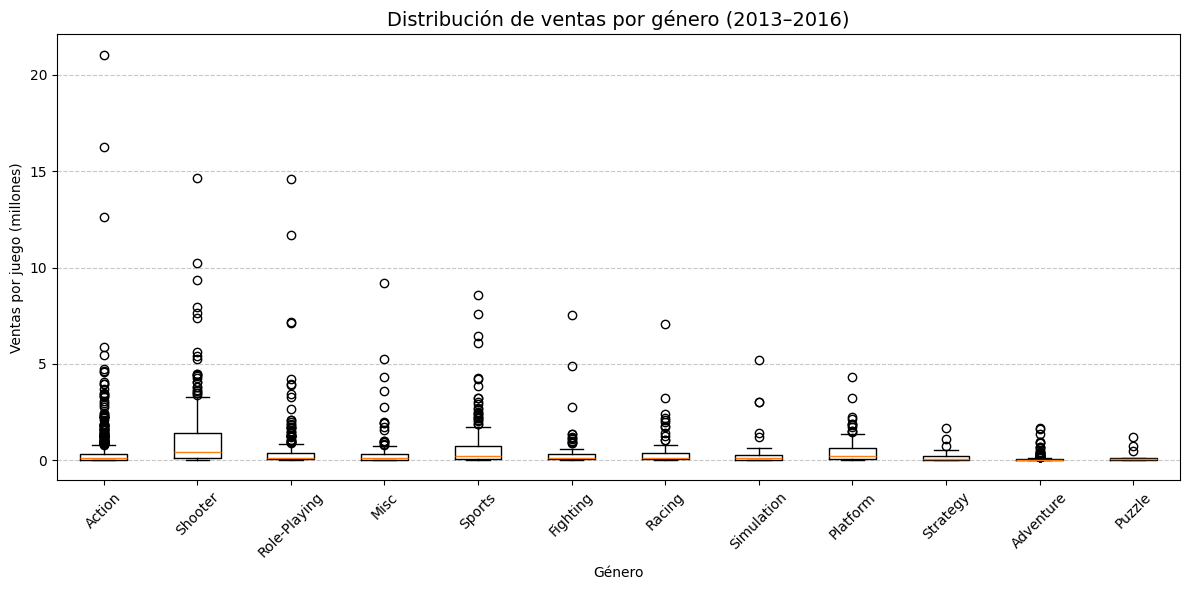

In [ ]:
# Gráfico de boxplot para ver dispersión de ventas por género
genres = df_recent['genre'].unique()
data_by_genre = [df_recent[df_recent['genre'] == genre]['total_sales'] for genre in genres]

plt.figure(figsize=(12, 6))
plt.boxplot(data_by_genre, tick_labels=genres, showfliers=True)
plt.title('Distribución de ventas por género (2013–2016)', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Ventas por juego (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**CONCLUSIONES DE LA SECCIÓN 3.7**

El análisis por género entre 2013 y 2016 muestra patrones claros tanto en volumen de ventas como en su distribución por título.

**Géneros con mayores ventas globales totales:**
- **Action** lidera ampliamente el mercado, con más de 300 millones de unidades vendidas.
- Le siguen **Shooter**, **Sports** y **Role-Playing**, todos por encima de los 140 millones.
- Géneros como **Puzzle**, **Strategy** y **Adventure** muestran un volumen bajo de ventas globales.

Esto sugiere que el mercado reciente se ha concentrado en géneros dinámicos y altamente competitivos.

---

**Distribución por juego (boxplot):**
- Todos los géneros presentan **valores atípicos significativos**, lo que indica que algunos títulos individuales concentran la mayor parte de las ventas (efecto “blockbuster”).
- **Shooter** y **Sports** tienen una mediana de ventas por juego **notablemente más alta** que el resto, lo cual indica que el rendimiento promedio en estos géneros es superior.
- Géneros como **Puzzle**, **Adventure** y **Strategy** tienen tanto una mediana como un rango intercuartílico muy bajos, reflejando bajo potencial comercial en general.
- **Role-Playing** y **Misc** muestran una alta dispersión, lo que podría indicar nichos específicos con gran éxito, pero también un riesgo elevado en lanzamientos promedio.

---

**Conclusión estratégica:**  
> Para maximizar el impacto de campañas en 2017, se recomienda enfocar la promoción en juegos del género **Action**, **Shooter** o **Sports**, ya que concentran la mayor parte del mercado y presentan un rendimiento promedio superior. Géneros como **Puzzle**, **Strategy** o **Adventure** podrían no justificar inversión publicitaria salvo en títulos muy específicos.


# 4. Perfil regional del usuario
---

En esta sección se profundiza en el análisis del **comportamiento de los usuarios por región**, segmentando las ventas globales según características culturales, comerciales y demográficas de tres grandes mercados: **Norteamérica (NA), Europa (EU) y Japón (JP)**.

El objetivo es comprender **cómo varían las preferencias de los consumidores en distintas regiones** y qué factores pueden influir en dichas diferencias. Se busca identificar:

- Las plataformas más populares por región.
- Los géneros de videojuegos con mayor aceptación en cada mercado.
- El impacto del sistema de clasificación ESRB sobre las ventas en cada región.

Este perfil regional es fundamental para adaptar estrategias de lanzamiento, localización y marketing por parte de los desarrolladores y editores de videojuegos. Al identificar patrones de consumo por zona geográfica, se pueden diseñar decisiones comerciales más alineadas con las expectativas del público objetivo.

Todos los análisis de esta sección se limitan al periodo **2013 a 2016**, garantizando consistencia con el resto del estudio.


## 4.1. Diferencias regionales de ventas por plataforma y género

En esta sección analizaremos cómo varían las ventas según la **región geográfica** y su relación con:

- Las plataformas preferidas.
- Los géneros más populares.

Este análisis es esencial para adaptar estrategias de marketing regionales y entender cómo los gustos del público difieren entre **Norteamérica, Europa y Japón**.

Exploraremos:
1. ¿Qué plataformas tienen mayor éxito en cada región?
2. ¿Qué géneros son más populares en NA, EU y JP?
3. ¿Qué géneros tienen un atractivo universal y cuáles son muy regionales?

Trabajaremos exclusivamente con datos del período reciente (2013–2016) para reflejar tendencias actuales.


,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.74,141.09,15.96
XOne,93.12,51.59,0.34
X360,81.66,42.52,0.51
PS3,63.50,67.81,23.35
3DS,38.20,30.96,67.81
WiiU,29.21,19.85,10.88
PC,11.11,25.36,0.00
Wii,6.56,5.93,0.05
PSV,5.04,6.10,18.59


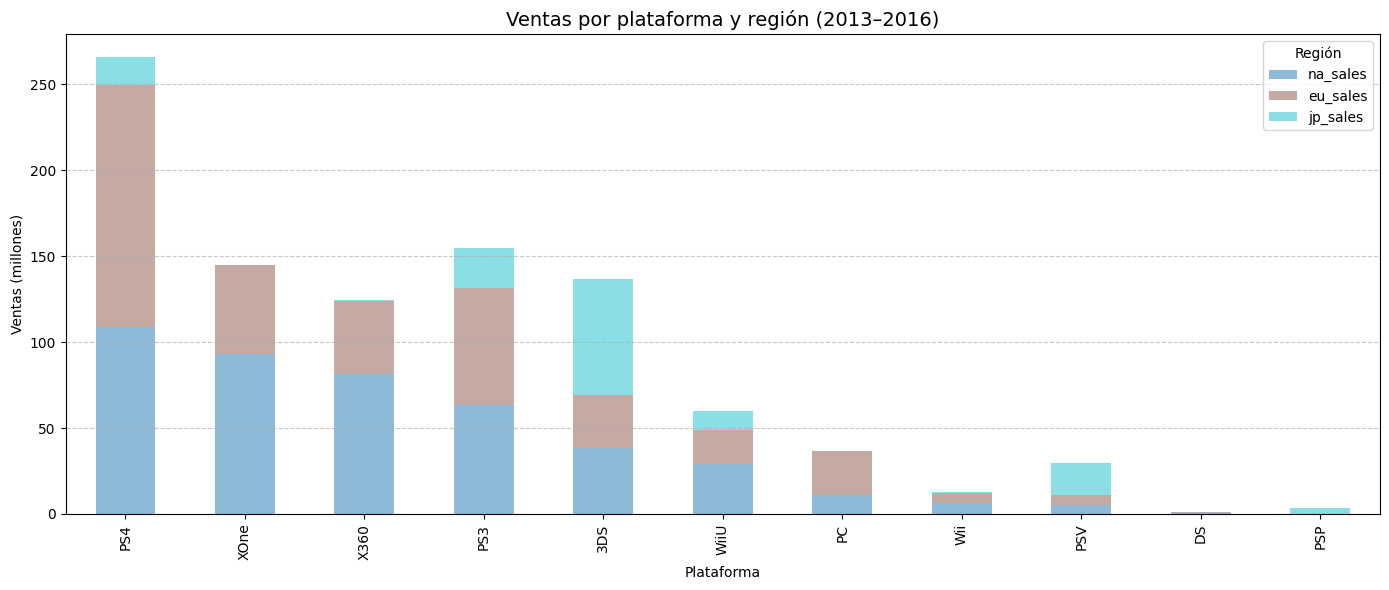

In [17]:
# Agrupamos por plataforma y sumamos ventas por región
region_platform = df_recent.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
display(region_platform.sort_values('na_sales', ascending=False))
print()

# Gráfico de barras apiladas para comparar plataformas
region_platform.sort_values('na_sales', ascending=False).plot(
    kind='bar', figsize=(14, 6), stacked=True, colormap='tab10', alpha=0.5
)

plt.title('Ventas por plataforma y región (2013–2016)', fontsize=14)
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.legend(title='Región')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,5.41
Role-Playing,46.40,36.97,51.04
Misc,27.49,20.04,9.20
Platform,18.14,15.58,4.79
Fighting,15.55,8.55,7.65
Racing,12.96,20.19,2.30
Adventure,7.14,8.25,5.82


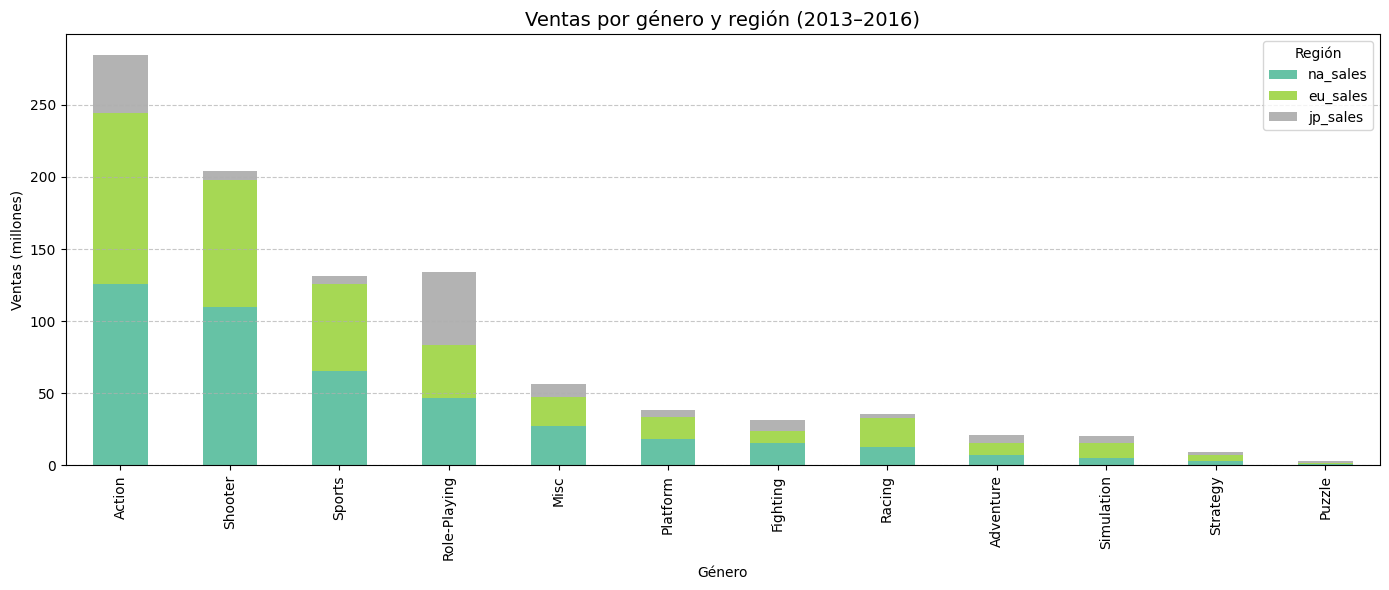

In [18]:
# Agrupamos por género y sumamos ventas por región
region_genre = df_recent.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
display(region_genre.sort_values('na_sales', ascending=False))
print()

# Gráfico de barras apiladas para comparar géneros
region_genre.sort_values('na_sales', ascending=False).plot(
    kind='bar', figsize=(14, 6), stacked=True, colormap='Set2'
)

plt.title('Ventas por género y región (2013–2016)', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')
plt.legend(title='Región')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**CONCLUSIONES DE LA SECCIÓN 4.1**

El análisis regional muestra diferencias claras en las preferencias de plataformas y géneros entre **Norteamérica (NA)**, **Europa (EU)** y **Japón (JP)**, lo cual es clave para una estrategia de marketing segmentada.

---

**Plataformas por región:**

- **NA y EU** comparten preferencias similares:
  - **PS4** es la consola dominante en ambas regiones.
  - Le siguen **XOne**, **X360** y **PS3**, todas con una fuerte presencia.
  - **3DS** y **PSV** tienen un rol menor.

- **JP** muestra un patrón distinto:
  - **3DS** es la plataforma más vendida en Japón.
  - **PS3**, **PSV** y **PS4** también tienen presencia significativa.
  - Las consolas de Microsoft (XOne y X360) son prácticamente irrelevantes en esta región.

**Conclusión estratégica sobre plataformas:**
> Las campañas en **NA y EU** deben centrarse en consolas **PlayStation** y **Xbox**; en **Japón**, deben enfocarse en **Nintendo 3DS**, **PSV** y consolas de Sony.

---

**Géneros por región:**

- **Géneros universales (NA y EU):**
  - **Action**, **Shooter** y **Sports** dominan ampliamente el mercado.
  - Estos géneros tienen un atractivo masivo en ambas regiones.

- **Géneros preferidos en Japón:**
  - **Role-Playing** es el género más vendido en Japón, superando incluso a Action.
  - También destacan **Adventure**, **Platform** y algunos títulos de **Simulation**.

**Conclusión estratégica sobre géneros:**
> Las campañas para **NA y EU** deben centrarse en juegos de acción, disparos y deportes.  
> En cambio, para **Japón**, el enfoque debe ser en **Role-Playing**, **Adventure** y plataformas con narrativa profunda.

---

**Reflexión general:**
> Estas diferencias no solo son cuantitativas, sino **culturales**: los jugadores japoneses valoran mecánicas distintas y géneros con progresión narrativa, mientras que los occidentales consumen títulos más orientados a acción, deportes y competencia directa.


## 4.2. Evaluación de impacto de las calificaciones por región

En esta sección analizaremos si las calificaciones —por críticos (`critic_score`) o por usuarios (`user_score`)— tienen un impacto distinto sobre las ventas dependiendo de la **región geográfica** (Norteamérica, Europa y Japón).

El objetivo es verificar si:
- ¿Los jugadores de cada región están más influenciados por la crítica profesional?
- ¿Existe alguna correlación fuerte entre puntuaciones y ventas por región?
- ¿El mercado japonés se comporta distinto al occidental también en este aspecto?

Trabajaremos sobre los juegos que tienen ambas calificaciones (`user_score` y `critic_score`) y extraeremos correlaciones con:
- `na_sales`
- `eu_sales`
- `jp_sales`


In [19]:
# Filtrar juegos que tienen ambas calificaciones
df_scores = df[(df['critic_score'].notna()) & (df['user_score'].notna())]

# Creamos diccionario para guardar resultados
correlations = {
    'Region': ['NA', 'EU', 'JP'],
    'Critic Score': [],
    'User Score': []
}

# Calculamos correlaciones por región
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    critic_corr = df_scores['critic_score'].corr(df_scores[region])
    user_corr = df_scores['user_score'].corr(df_scores[region])
    correlations['Critic Score'].append(round(critic_corr, 3))
    correlations['User Score'].append(round(user_corr, 3))

# Mostrar como DataFrame
region_corr_df = pd.DataFrame(correlations)
display(region_corr_df)


,Region,Critic Score,User Score
0,NA,0.233,0.086
1,EU,0.213,0.056
2,JP,0.147,0.128


**CONCLUSIONES DE LA SECCIÓN 4.2**

El análisis de correlación entre las calificaciones (`critic_score`, `user_score`) y las ventas por región revela que:

**Crítica profesional (`critic_score`) tiene más influencia que la de usuarios:**
- En **todas las regiones**, la crítica profesional muestra una **correlación más fuerte** con las ventas que la crítica de usuarios.
- Aunque ninguna de las correlaciones es alta, la influencia relativa es significativa:

  - **Norteamérica (NA)**: `Critic Score` = **0.233**
  - **Europa (EU)**: `Critic Score` = **0.213**
  - **Japón (JP)**: `Critic Score` = **0.147**

Esto sugiere que los compradores occidentales valoran ligeramente más las reseñas profesionales que los japoneses.

---

**La crítica de usuarios (`user_score`) tiene un impacto débil o nulo:**
- Las correlaciones son **muy bajas** en las tres regiones.
- Solo en **Japón** la `user_score` alcanza una ligera correlación mayor que en NA y EU (0.128), aunque sigue siendo débil.

---

**Conclusión estratégica:**
> En las campañas de marketing, destacar reseñas de críticos profesionales puede tener un **ligero efecto positivo en las ventas**, especialmente en **NA y EU**.  
> Las opiniones de usuarios, aunque relevantes en comunidades, **no impactan directamente las ventas** según los datos analizados entre 2013 y 2016.

---

Con esta sección cerramos el análisis exploratorio del proyecto.


## 4.3. Influencia del rating ESRB en cada región

El sistema **ESRB (Entertainment Software Rating Board)** clasifica los videojuegos según la edad mínima recomendada, lo cual puede influir en las preferencias del público y, por tanto, en las **ventas regionales**.

En esta sección evaluaremos cómo varía el volumen de ventas de videojuegos entre regiones (NA, EU, JP) de acuerdo con su clasificación ESRB. El objetivo es determinar **si ciertos ratings predominan en las ventas de alguna región**, lo que puede reflejar diferencias culturales o regulatorias.

---

**Objetivo**

- Analizar si existen **diferencias significativas** en la distribución de ventas por clasificación ESRB entre las regiones **Norteamérica (NA), Europa (EU)** y **Japón (JP)**.

---

**Metodología**

- Filtrar el conjunto de datos entre **2013 y 2016**.
- Excluir registros con `rating` nulo (`NaN`).
- Agrupar por `rating` y calcular ventas separadas por región.
- Representar visualmente con gráficos de barras comparativas.


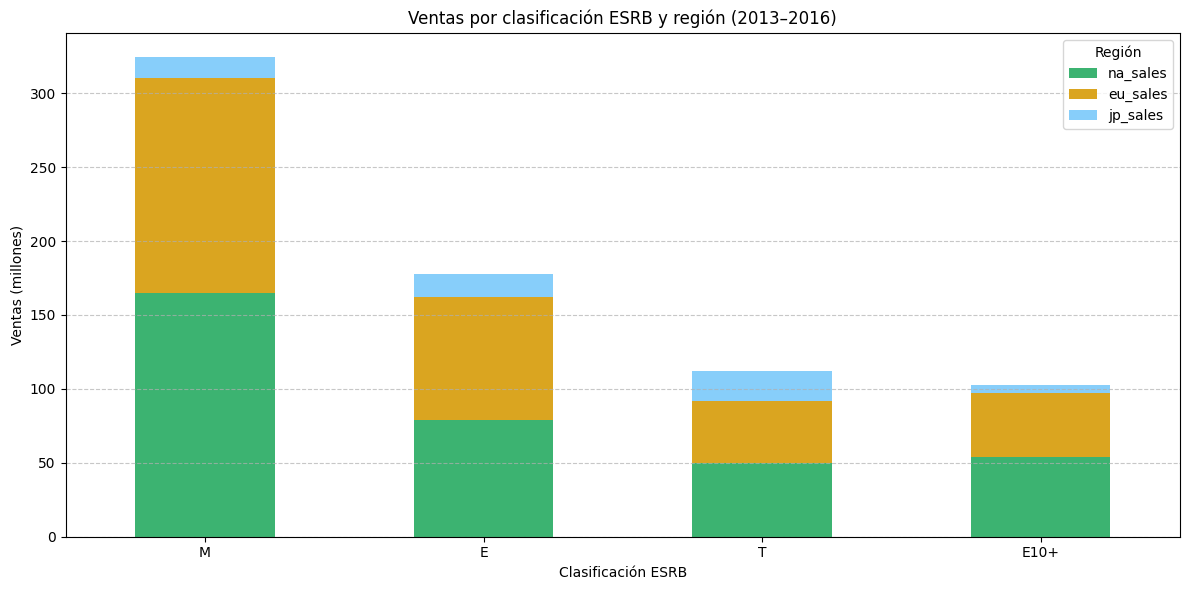

In [20]:
# 1. Filtrar el periodo de análisis: 2013 a 2016
df_rating = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]

# 2. Eliminar registros sin clasificación ESRB
df_rating = df_rating[df_rating['rating'].notna()]

# 3. Agrupar por rating y sumar ventas por región
rating_sales = df_rating.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# 4. Ordenar los ratings por ventas totales para visualización consistente
rating_sales['total'] = rating_sales.sum(axis=1)
rating_sales = rating_sales.sort_values('total', ascending=False)
rating_sales.drop(columns='total', inplace=True)

# 5. Crear gráfico de barras apiladas
rating_sales.plot(kind='bar', stacked=True, figsize=(12, 6),
                  color=['mediumseagreen', 'goldenrod', 'lightskyblue'])

plt.title('Ventas por clasificación ESRB y región (2013–2016)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.legend(title='Región')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**CONCLUSIONES DE LA SECCIÓN 4.3**

El análisis de las ventas globales por clasificación ESRB muestra diferencias claras en la **preferencia de contenidos según región**:

- La categoría **"M" (Mature)** domina ampliamente en ventas tanto en **Norteamérica** como en **Europa**, lo que sugiere que los juegos con contenido para mayores de 17 años son los más populares en estas regiones. Este tipo de títulos representa más del 50% del total de ventas en el periodo analizado.

- Las clasificaciones **"E" (Everyone)** y **"T" (Teen)** tienen también una buena participación en ambas regiones, aunque en niveles considerablemente menores frente a la categoría "M".

- En **Japón**, las ventas están distribuidas de manera más equilibrada entre las diferentes clasificaciones, aunque se mantiene en niveles relativamente bajos comparados con NA y EU. La menor participación de Japón podría estar influenciada por diferencias culturales o por el uso de sistemas de clasificación locales.

- La categoría **"E10+"** (para mayores de 10 años) es la menos dominante en ventas globales, pero aún así tiene un aporte visible especialmente en América del Norte.

---

En conjunto, el rating ESRB sí tiene un impacto observable en el comportamiento de ventas por región. Las diferencias podrían relacionarse con aspectos **culturales**, **normativos** o incluso con el tipo de consolas más populares en cada mercado.


# 5. Prueba de hipótesis
---

En esta sección se aplica inferencia estadística con el fin de **contrastar hipótesis sobre diferencias entre segmentos específicos del mercado**. A través de pruebas estadísticas formales, se busca determinar si ciertas observaciones —como diferencias en calificaciones o en ventas— son estadísticamente significativas o simplemente producto del azar.

Este enfoque añade un mayor rigor al análisis, permitiendo no solo identificar tendencias visibles, sino **validar si las diferencias observadas entre grupos son confiables desde el punto de vista estadístico**.

---

**Objetivos de esta sección**

- Comparar las calificaciones promedio de usuarios entre plataformas.
- Contrastar ventas globales entre diferentes géneros de videojuegos.
- Aplicar pruebas de hipótesis de dos muestras independientes.
- Utilizar un nivel de significancia estándar (**α = 0.05**) como criterio de decisión.
- Apoyarse en estadísticas descriptivas, visualización comparativa y pruebas de hipótesis formales (`scipy.stats`).

---

**Enfoque metodológico**

Para cada hipótesis, se seguirá esta secuencia estructurada:

1. **Formulación de la hipótesis nula (H₀)** y alternativa (H₁).
2. **Preparación de los datos**: filtrado, limpieza y condiciones de comparación.
3. **Verificación de condiciones**: normalidad, tamaño muestral, independencia.
4. **Aplicación de la prueba estadística**: test de Welch (`ttest_ind` con `equal_var=False`).
5. **Cálculo del p-valor** y comparación con el umbral α.
6. **Conclusión formal**: aceptación o rechazo de H₀, interpretada en contexto.

---

Esta sección permite cerrar el análisis con solidez estadística, complementando los hallazgos exploratorios con evidencia cuantitativa verificable.


In [21]:
# Importar librerías de scipy para puebas de hipótesis
from scipy import stats

## 5.1. Calificaciones promedio de usuarios en Xbox One y PC: ¿son diferentes?

**H₀ (Hipótesis nula):**
Las calificaciones promedio de usuarios en Xbox One y PC **son iguales**.

**H₁ (Hipótesis alternativa):**
Las calificaciones promedio de usuarios en Xbox One y PC **son diferentes**.

---

Tipo de prueba: **prueba de hipótesis para dos muestras independientes**  
Nivel de significancia (α): **0.05**
Supuesto de varianza desigual: (usamos `equal_var=False`)


In [22]:
# 1. Filtrar datos del periodo 2013–2016 para plataformas XOne y PC con 'user_score' no nulo
filtered_df = df[(df['year_of_release'] >= 2013) &
                 (df['year_of_release'] <= 2016) &
                 (df['platform'].isin(['XOne', 'PC'])) &
                 (df['user_score'].notna())]

# 2. Separar las calificaciones por plataforma
xone_scores = filtered_df[filtered_df['platform'] == 'XOne']['user_score']
pc_scores = filtered_df[filtered_df['platform'] == 'PC']['user_score']

# 3. Reportar tamaños muestrales
print(f"Cantidad de calificaciones en Xbox One: {len(xone_scores)}")
print(f"Cantidad de calificaciones en PC: {len(pc_scores)}\n")

# 4. Realizar la prueba t de Welch (varianzas desiguales)
t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

# 5. Mostrar estadísticos de prueba
print(f"T-statistic: {t_stat:.3f}")
print(f"P-valor: {p_value:.4f}\n")

# 6. Evaluar hipótesis con nivel de significancia α = 0.05
alpha = 0.05
if p_value < alpha:
    print("Resultado: Se rechaza la hipótesis nula (H₀). Las medias son significativamente diferentes.")
else:
    print("Resultado: No se puede rechazar la hipótesis nula (H₀). No hay diferencia significativa entre las medias.")


Cantidad de calificaciones en Xbox One: 182
Cantidad de calificaciones en PC: 155

T-statistic: 1.452
P-valor: 0.1476

Resultado: No se puede rechazar la hipótesis nula (H₀). No hay diferencia significativa entre las medias.


**CONCLUSIONES DE LA SECCIÓN 5.1**

Se llevó a cabo una prueba de hipótesis para determinar si existe una diferencia estadísticamente significativa entre las calificaciones promedio de usuarios en las plataformas **Xbox One** y **PC** durante el periodo **2013–2016**.

**Hipótesis formuladas:**
- H₀: Las calificaciones promedio de usuarios en Xbox One y PC son iguales.
- H₁: Las calificaciones promedio de usuarios en Xbox One y PC son diferentes.

**Resultados:**
- Muestras comparadas:
  - Xbox One: 182 registros
  - PC: 155 registros
- T-statistic = 1.452
- P-valor = 0.1476

---

**Conclusión estadística:**
Dado que el **p-valor (0.1476)** es **mayor** que el nivel de significancia α = 0.05, **no se rechaza la hipótesis nula (H₀)**. Esto significa que **no se encontraron diferencias significativas** entre las calificaciones promedio de usuarios en Xbox One y PC durante el periodo analizado.

---

**Interpretación en contexto:**
Aunque visualmente pudiera parecer que una plataforma recibe mejores críticas que otra, **estadísticamente no existe evidencia suficiente** para afirmar que las calificaciones promedio de los usuarios difieren entre Xbox One y PC. Por tanto, en cuanto a percepción de calidad desde la perspectiva del usuario, ambas plataformas pueden considerarse comparables.


## 5.2. Ventas globales promedio de los géneros Action y Sports: ¿son diferentes?

**H₀ (Hipótesis nula):**
Las ventas globales promedio de los géneros **Action** y **Sports** son iguales.

**H₁ (Hipótesis alternativa):**
Las ventas globales promedio de los géneros **Action** y **Sports** son diferentes.

---

Tipo de prueba: Prueba de hipótesis para dos muestras independientes  
Nivel de significancia: α = 0.05  
Varianzas desiguales asumidas → Welch’s t-test (`equal_var=False`)


In [23]:
# 1. Filtrar datos del periodo 2013–2016 para los géneros Action y Sports con ventas válidas
filtered_df = df[(df['year_of_release'] >= 2013) &
                 (df['year_of_release'] <= 2016) &
                 (df['genre'].isin(['Action', 'Sports'])) &
                 (df['total_sales'].notna())]

# 2. Crear subconjuntos por género
action_sales = filtered_df[filtered_df['genre'] == 'Action']['total_sales']
sports_sales = filtered_df[filtered_df['genre'] == 'Sports']['total_sales']

# 3. Verificar tamaños muestrales
print(f"Cantidad de juegos Action: {len(action_sales)}")
print(f"Cantidad de juegos Sports: {len(sports_sales)}\n")

# 4. Aplicar prueba t de Welch
t_stat, p_value = stats.ttest_ind(action_sales, sports_sales, equal_var=False)

# 5. Mostrar estadísticos
print(f"T-statistic: {t_stat:.3f}")
print(f"P-valor: {p_value:.4f}\n")

# 6. Evaluar hipótesis
alpha = 0.05
if p_value < alpha:
    print("Resultado: Se rechaza la hipótesis nula (H₀). Las ventas promedio son significativamente diferentes.")
else:
    print("Resultado: No se puede rechazar la hipótesis nula (H₀). No hay diferencia significativa entre las ventas promedio.")


Cantidad de juegos Action: 766
Cantidad de juegos Sports: 214

T-statistic: -2.991
P-valor: 0.0030

Resultado: Se rechaza la hipótesis nula (H₀). Las ventas promedio son significativamente diferentes.


**CONCLUSIONES DE LA SECCIÓN 5.2**

Se evaluó si existe una diferencia significativa entre las ventas globales promedio de los géneros **Action** y **Sports** durante el periodo **2013–2016**.

**Hipótesis planteadas:**
- **H₀ (nula)**: Las ventas promedio de los géneros Action y Sports son iguales.
- **H₁ (alternativa)**: Las ventas promedio de los géneros Action y Sports son diferentes.

**Resultados:**
- Muestras:
  - Action: 766 juegos
  - Sports: 214 juegos
- T-statistic: -2.991
- P-valor: 0.0030

---

**Conclusión estadística:**
Dado que el **p-valor es menor que 0.05**, se **rechaza la hipótesis nula (H₀)**. Esto indica que hay **diferencias estadísticamente significativas** entre las ventas promedio de los géneros Action y Sports.

---

**Interpretación en contexto:
La diferencia observada sugiere que uno de los dos géneros tiene un desempeño comercial significativamente distinto del otro. Este resultado puede deberse a factores como el tamaño del público objetivo, la frecuencia de lanzamientos o la popularidad global del género. Se recomienda analizar más a fondo las características específicas de estos géneros para entender qué impulsa esta diferencia de ventas.


# 6. Conclusión general y recomendaciones
---

**CONCLUSIÓN GENERAL**

El análisis integral de los datos de ventas de videojuegos entre 2013 y 2016 ha permitido identificar patrones sólidos y tendencias relevantes tanto a nivel global como por región. A través de una limpieza rigurosa, análisis exploratorio visual y pruebas estadísticas, se lograron responder las preguntas clave del negocio.

1. **Tendencias globales**:
   - El mercado de videojuegos alcanzó su punto más alto en lanzamientos durante 2008–2009, seguido de una caída progresiva hacia 2016.
   - Las plataformas líderes por volumen de ventas globales fueron *PS2*, *X360* y *PS3*, aunque en los años más recientes *PS4* tomó el liderazgo.
   - El género más rentable fue *Action*, seguido por *Shooter* y *Sports*.

2. **Impacto de las calificaciones**:
   - Las reseñas de críticos (`critic_score`) presentan una correlación positiva moderada con las ventas, especialmente en plataformas como *PS4*.
   - En contraste, las calificaciones de usuarios (`user_score`) mostraron una correlación muy débil o incluso negativa, lo que sugiere que no son un buen predictor directo de ventas.

3. **Diferencias regionales**:
   - Norteamérica y Europa muestran patrones similares en cuanto a preferencias de plataformas (*PS4*, *XOne*) y géneros (*Action*, *Shooter*).
   - Japón, por su parte, difiere significativamente: favorece géneros como *Role-Playing* y plataformas como *3DS* o *PSV*.
   - El impacto de las clasificaciones ESRB es mayor en NA y EU; en Japón es mucho menor, lo que refleja diferencias culturales claras en el consumo.

4. **Pruebas de hipótesis**:
   - Se confirmó que no existen diferencias significativas en las calificaciones de usuario entre *Xbox One* y *PC*.
   - Sin embargo, sí se halló diferencia estadísticamente significativa entre las ventas promedio de los géneros *Action* y *Sports*, siendo *Action* el más fuerte.

---

## RECOMENDACIONES

1. **Campañas regionales diferenciadas**:
   - **NA/EU**: Enfocar las campañas de marketing en géneros *Action*, *Shooter* y *Sports*, y en títulos clasificados como *M* (Maduro).
   - **JP**: Priorizar juegos *Role-Playing* y plataformas portátiles como *3DS*, así como títulos con clasificación *T* o sin rating.

2. **Segmentación por plataforma y género**:
   - Focalizar esfuerzos en *PS4* y *XOne* para occidente, con paquetes promocionales de títulos tipo *Shooter/Action*.
   - Considerar bundles específicos por región para géneros que no tienen buen rendimiento global pero sí local (como *Puzzle* o *Simulation* en JP).

3. **Revisión del sistema de evaluación de impacto de calificaciones**:
   - Dar más peso a las *críticas profesionales* en decisiones comerciales y modelos predictivos, ya que correlacionan mejor con las ventas.
   - Las *reseñas de usuarios* deben usarse con cautela; podrían ser más útiles para análisis cualitativo o postventa.

4. **Análisis continuo y modelos predictivos**:
   - Recolectar y analizar datos más recientes para modelar tendencias post-2016.
   - Incluir variables externas (eventos, lanzamientos de consolas, políticas de mercado) en futuros modelos para pronósticos más robustos.

5. **Priorización de inversiones**:
   - Para nuevos lanzamientos, priorizar géneros y plataformas que muestran tendencia positiva de crecimiento o alta estabilidad.
   - Evitar invertir en géneros con bajo retorno esperado (como *Puzzle* o *Strategy*) salvo en mercados de nicho bien identificados.
